In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/efficientnetb0-notop/efficientnetb0_notop.h5
/kaggle/input/soc-data-set/CUB_200_2011/attributes.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/images.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/train_test_split.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/image_class_labels.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/README
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/classes.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/bounding_boxes.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/parts/part_click_locs.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/parts/part_locs.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/parts/parts.txt
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0041_795605.jpg
/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0066_29190.jpg
/kaggle/input/soc-d

In [44]:
!tar -xvf path_to_zip file

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


tar: path_to_zip: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
import shutil
from tensorflow.keras.models import Model

In [47]:
import os
# Create 'train' and 'test' directories
train_dir = 'train'
test_dir = 'test'

# Check if directories already exist; if not, create them
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

print(f'Directories {train_dir} and {test_dir} created successfully.')

Directories train and test created successfully.


In [50]:
import pandas as pd
images_file = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/images.txt'
classes_file = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/classes.txt'
image_class_labels_file = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/image_class_labels.txt'
train_test_split_file = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/train_test_split.txt'

# Read each file into a dataframe
images_df = pd.read_csv(images_file, sep=' ', header=None, names=['image_id', 'image_name'])
classes_df = pd.read_csv(classes_file, sep=' ', header=None, names=['class_id', 'class_name'])
image_class_labels_df = pd.read_csv(image_class_labels_file, sep=' ', header=None, names=['image_id', 'class_id'])
train_test_split_df = pd.read_csv(train_test_split_file, sep=' ', header=None, names=['image_id', 'is_training_image'])

In [51]:
# Merge images_df with image_class_labels_df on 'image_id'
merged_df = pd.merge(images_df, image_class_labels_df, on='image_id')

# Merge the result with train_test_split_df on 'image_id'
merged_df = pd.merge(merged_df, train_test_split_df, on='image_id')

# Merge the result with classes_df on 'class_id'
merged_df = pd.merge(merged_df, classes_df, on='class_id')

# Display the first few rows of the merged dataframe to verify
print(merged_df.head())

   image_id                                         image_name  class_id  \
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...         1   
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...         1   

   is_training_image                  class_name  
0                  0  001.Black_footed_Albatross  
1                  1  001.Black_footed_Albatross  
2                  0  001.Black_footed_Albatross  
3                  1  001.Black_footed_Albatross  
4                  1  001.Black_footed_Albatross  


In [52]:
# Define function to create class subdirectories
def create_class_subdirectories(base_dir, class_names):
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

# File paths (adjust according to where your data files are located)
classes_file = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/classes.txt'
images_file = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/images.txt'

# Read each file into a dataframe
classes_df = pd.read_csv(classes_file, sep=' ', header=None, names=['class_id', 'class_name'])
images_df = pd.read_csv(images_file, sep=' ', header=None, names=['image_id', 'image_name'])

# Get the list of class names from the classes dataframe
class_names = classes_df['class_name'].tolist()

# Define base directories in Kaggle working directory
train_base_dir = '/kaggle/working/train'
test_base_dir = '/kaggle/working/test'

# Create subdirectories in the train and test directories
create_class_subdirectories(train_base_dir, class_names)
create_class_subdirectories(test_base_dir, class_names)

print(f'Subdirectories created in "{train_base_dir}" and "{test_base_dir}" directories.')

Subdirectories created in "/kaggle/working/train" and "/kaggle/working/test" directories.


In [53]:
images_dir = '/kaggle/input/soc-data-set/CUB_200_2011/CUB_200_2011/images'
filtered_df_train = merged_df[merged_df['is_training_image'] == 1]
filtered_train=filtered_df_train['image_name'].tolist()
filtered_df_test = merged_df[merged_df['is_training_image'] == 0]
filtered_test=filtered_df_test['image_name'].tolist()
def move_images(base_dir, image_name):
    src_image_path = os.path.join(images_dir, image_name)  
    dst_image_path = os.path.join(base_dir, image_name)
    if os.path.exists(src_image_path):
        shutil.copy(src_image_path, dst_image_path)
    else:
        print(f"Warning: {src_image_path} does not exist")
# Move training images
for training_image in filtered_train:
     move_images(train_dir, training_image)

# Move testing images
for testing_image in filtered_test:
    move_images(test_dir, testing_image)

print("Images have been successfully organized.")

Images have been successfully organized.


In [54]:
checkpoint_dir = '/kaggle/working/model_checkpoints'

# Create checkpoint directory if it doesn't exist
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Print the directory path for confirmation
print(f"Checkpoint directory: {checkpoint_dir}")

# List contents of the directory before saving
print("Contents of checkpoint directory before saving:")
print(os.listdir(checkpoint_dir))

Checkpoint directory: /kaggle/working/model_checkpoints
Contents of checkpoint directory before saving:
[]


In [55]:
import tensorflow as tf

# Define directories
train_dir = '/kaggle/working/train'
test_dir = '/kaggle/working/test'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize to match the input size of the pre-trained model
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5994 images belonging to 200 classes.
Found 5794 images belonging to 200 classes.


In [56]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Load pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setup callbacks
checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // 32,
    validation_data=test_data,
    validation_steps=test_data.samples // 32,
    epochs=10,
    callbacks=[checkpoint]
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/187 ━━━━━━━━━━━━━━━━━━━━ 33:39 11s/step - accuracy: 0.0000e+00 - loss: 16.8874

W0000 00:00:1722942507.712997     290 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 114s 557ms/step - accuracy: 0.1028 - loss: 10.5719 - val_accuracy: 0.3037 - val_loss: 4.0705
Epoch 2/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.2188 - loss: 4.4032

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2188 - loss: 4.4032 - val_accuracy: 0.0000e+00 - val_loss: 4.3896
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 103s 536ms/step - accuracy: 0.3572 - loss: 3.6431 - val_accuracy: 0.3674 - val_loss: 3.3153
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - accuracy: 0.2812 - loss: 3.1809 - val_accuracy: 0.0000e+00 - val_loss: 4.1739
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 102s 528ms/step - accuracy: 0.4541 - loss: 2.9385 - val_accuracy: 0.3892 - val_loss: 3.1164
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 155us/step - accuracy: 0.4062 - loss: 2.8904 - val_accuracy: 0.0000e+00 - val_loss: 3.6636
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 101s 524ms/step - accuracy: 0.4722 - loss: 2.7420 - val_accuracy: 0.3717 - val_loss: 3.1008
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2812 - loss: 3.0890 - val_accuracy: 0.5000 - val_loss: 1.9085
Epoch 9/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 101s 521ms/step - accuracy: 0.5269 - loss: 2.53

In [57]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print('Test accuracy:', accuracy*100.0,'%')

# Save the model
model.save('final_model.h5')
model.summary()


182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.4075 - loss: 3.0171
Test Loss: 3.0279555320739746
Test Accuracy: 0.40386608242988586
Test accuracy: 40.386608242988586 %


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 6,808,218 (25.97 MB)

 Trainable params: 1,516,744 (5.79 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 3,033,490 (11.57 MB)

In [58]:
# Unfreeze all layers in the base model
base_model.trainable = True

# To avoid training all layers at once, you might want to use a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with all layers unfrozen
history_fine_tune = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // 32,
    validation_data=test_data,
    validation_steps=test_data.samples // 32,
    epochs=4,  # Train for 3-4 epochs
    callbacks=[checkpoint]
)

# Save the model after fine-tuning
model.save('fine_tuned_model.keras')


Epoch 1/4
  1/187 ━━━━━━━━━━━━━━━━━━━━ 2:17:06 44s/step - accuracy: 0.4375 - loss: 3.0542

W0000 00:00:1722943302.206404     290 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.3945 - loss: 3.2457

W0000 00:00:1722943402.284318     293 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 160s 624ms/step - accuracy: 0.3948 - loss: 3.2444 - val_accuracy: 0.4384 - val_loss: 2.8710
Epoch 2/4
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4688 - loss: 2.8651 - val_accuracy: 0.5000 - val_loss: 2.1668
Epoch 3/4
187/187 ━━━━━━━━━━━━━━━━━━━━ 102s 531ms/step - accuracy: 0.5799 - loss: 2.4765 - val_accuracy: 0.4620 - val_loss: 2.7584
Epoch 4/4
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.6875 - loss: 2.0050 - val_accuracy: 0.5000 - val_loss: 1.3920


Epoch 1/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 43:03 14s/step - accuracy: 0.6562 - loss: 2.3037

W0000 00:00:1722943885.110870     293 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6305 - loss: 2.2007

W0000 00:00:1722943973.560829     293 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 119s 566ms/step - accuracy: 0.6306 - loss: 2.2003 - val_accuracy: 0.5055 - val_loss: 2.5092
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7188 - loss: 1.9048 - val_accuracy: 0.5000 - val_loss: 2.0673
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 103s 536ms/step - accuracy: 0.6919 - loss: 1.8670 - val_accuracy: 0.5243 - val_loss: 2.3880
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - accuracy: 0.8125 - loss: 1.7900 - val_accuracy: 0.5000 - val_loss: 1.8758
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 103s 533ms/step - accuracy: 0.7328 - loss: 1.6867 - val_accuracy: 0.5214 - val_loss: 2.3375
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - accuracy: 0.6562 - loss: 1.7503 - val_accuracy: 0.5000 - val_loss: 1.7423
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 103s 532ms/step - accuracy: 0.7503 - loss: 1.5769 - val_accuracy: 0.5416 - val_loss: 2.2128
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 155us/step - accuracy: 0.8125 - loss: 1.5364 - val_a

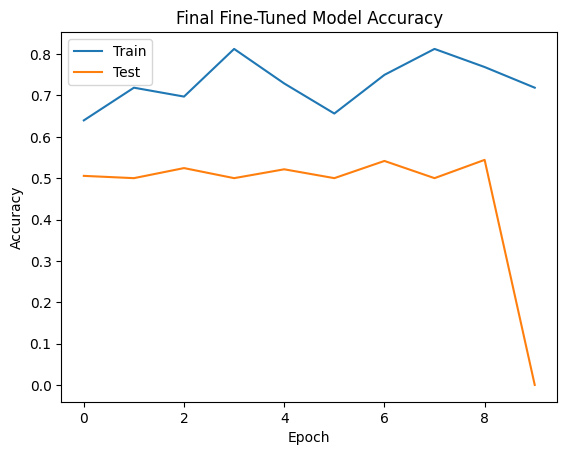

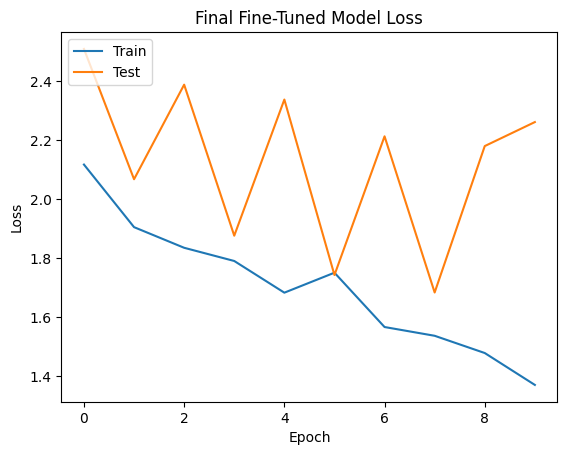

182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.5404 - loss: 2.2203
Final Tuned Test Loss: 2.1794490814208984
Final Tuned Test Accuracy (Fraction): 0.5448740124702454
Final Tuned Test Accuracy (Percentage): 54.49%


In [62]:
# Re-freeze all layers
for layer in base_model.layers[:-10]:  # Freezing all 10 layers
    layer.trainable = False

# Ensure the final few layers are trainable
for layer in base_model.layers[-3:]:
    layer.trainable = True

# Recompile the model with a potentially higher learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the last layers unfrozen
history_final_tune = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // 32,
    validation_data=test_data,
    validation_steps=test_data.samples // 32,
    epochs=10,  # Train for 10 more epochs
    callbacks=[checkpoint]
)

# Save the final model
model.save('final_tuned_model.keras')

# Visualization
plt.plot(history_final_tune.history['accuracy'])
plt.plot(history_final_tune.history['val_accuracy'])
plt.title('Final Fine-Tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_final_tune.history['loss'])
plt.plot(history_final_tune.history['val_loss'])
plt.title('Final Fine-Tuned Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(test_data)
print(f'Final Tuned Test Loss: {loss}')
print(f'Final Tuned Test Accuracy (Fraction): {accuracy}')

# Calculate accuracy percentage
accuracy_percentage_final_tune = accuracy * 100
print(f'Final Tuned Test Accuracy (Percentage): {accuracy_percentage_final_tune:.2f}%')